# Bootcamp Engenheiro(a) de Machine Learning

## Módulo 3 - Seleção de Modelos de Machine Learning

### Indian Liver Patient Dataset

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer


In [2]:
# Data Reading

df = pd.read_csv('Indian_Liver_Patient.csv')


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


,V1,V3,V4,V5,V6,V7,V8,V9,V10,Class
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      583 non-null    int64  
 1   V2      583 non-null    object 
 2   V3      583 non-null    float64
 3   V4      583 non-null    float64
 4   V5      583 non-null    int64  
 5   V6      583 non-null    int64  
 6   V7      583 non-null    int64  
 7   V8      583 non-null    float64
 8   V9      583 non-null    float64
 9   V10     583 non-null    float64
 10  Class   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


None

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
Class    0
dtype: int64


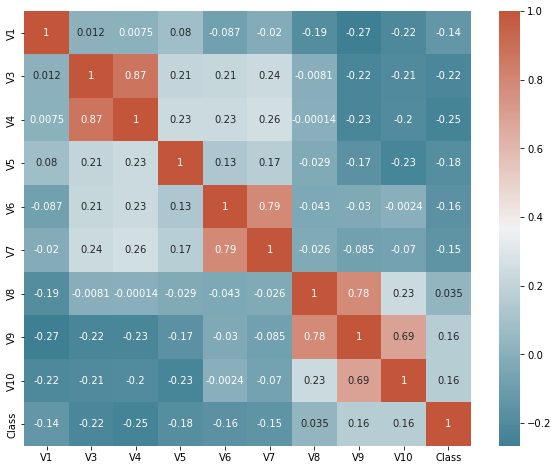

In [3]:
# Exploratory Data Analysis

# Dataframe
display(df)

# Generate descriptive statistics
display(df.describe())

# Concise summary
display(df.info())

# Missing values
print(df.isna().sum())

# Correlation matrix
corr = df.corr()
plt.subplots(figsize=(10,8));
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True));


In [4]:
# Preprocessing

# Replace values
df.replace({'Male': 0, 'Female': 1}, inplace=True)

# Component separation
X = df.iloc[:, 0:8]
y = df['Class']

# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Display
display(X)
display(y)


array([[ 1.25209764,  1.76228085, -0.41887783, ..., -0.35466541,
        -0.31839333,  0.29211961],
       [ 1.06663704, -0.56744644,  1.22517135, ..., -0.09159933,
        -0.03433257,  0.93756634],
       [ 1.06663704, -0.56744644,  0.6449187 , ..., -0.11352151,
        -0.14518555,  0.47653296],
       ...,
       [ 0.44843504, -0.56744644, -0.4027597 , ..., -0.17928803,
        -0.21100451, -0.0767071 ],
       [-0.84978917, -0.56744644, -0.32216906, ..., -0.28341834,
        -0.26989515,  0.29211961],
       [-0.41704777, -0.56744644, -0.37052344, ..., -0.32726269,
        -0.2976084 ,  0.75315299]])

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Class, Length: 583, dtype: int64

In [5]:
# SVC

# Score strategy
f1 = make_scorer(f1_score)

# Stratified cross-validation
skf = StratifiedKFold(n_splits=10)

# Model
svc = SVC(random_state=54)

# Hyperparameter
hiperparam = {'kernel':('poly', 'rbf', 'sigmoid'), 'C':uniform(loc=1, scale=9)}

# Randomized search
svc = RandomizedSearchCV(svc, hiperparam, random_state=54, cv=skf, scoring=f1)
svc.fit(X, y)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=SVC(random_state=54),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014A7320E5E0>,
                                        'kernel': ('poly', 'rbf', 'sigmoid')},
                   random_state=54, scoring=make_scorer(f1_score))

In [13]:
# Results

print('Summary of results:\n\n', svc.cv_results_)
print('\n\nThe best result:\n', svc.best_score_)
print('\nThe best parameters:\n', svc.best_params_)
print('\nBetter configuration of hyperparameters:\n', svc.best_estimator_)


Summary of results:

 {'mean_fit_time': array([0.01107507, 0.01463377, 0.01306026, 0.01613765, 0.01123831,
       0.01127799, 0.01062   , 0.0119863 , 0.01138039, 0.01080663]), 'std_fit_time': array([0.00350878, 0.0049116 , 0.00372364, 0.00059329, 0.00389192,
       0.00393364, 0.00365433, 0.00399721, 0.00415856, 0.00358376]), 'mean_score_time': array([0.00575054, 0.00239649, 0.00402131, 0.00383632, 0.0016294 ,
       0.00079978, 0.00249376, 0.0008004 , 0.00159929, 0.00359869]), 'std_score_time': array([0.00377122, 0.0036607 , 0.00402169, 0.00386544, 0.0032588 ,
       0.00239933, 0.0038138 , 0.00240119, 0.00319858, 0.0037888 ]), 'param_C': masked_array(data=[4.781646704266965, 1.0226501946441093,
                   5.664544553507286, 9.720425860475377, 4.99884156745529,
                   7.0433587165764155, 4.093814265162187,
                   4.6431463509697135, 9.180967680394282,
                   4.3190035845075965],
             mask=[False, False, False, False, False, False, Fa

In [7]:
# Random Forest

# Score strategy
f1 = make_scorer(f1_score)

# Stratified cross-validation
skf = StratifiedKFold(n_splits=10)

# Model
random_forest = RandomForestClassifier(random_state=54)

# Hyperparameter
hiperparam = {'bootstrap':(True, False), 'criterion':('gini', 'entropy'), 'n_estimators':randint(10, 1000)}

# Randomized search
random_forest = RandomizedSearchCV(random_forest, hiperparam, random_state = 54)
random_forest.fit(X, y)


RandomizedSearchCV(estimator=RandomForestClassifier(random_state=54),
                   param_distributions={'bootstrap': (True, False),
                                        'criterion': ('gini', 'entropy'),
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014A724BED30>},
                   random_state=54)

In [12]:
# Results

print('Summary of results:\n\n', random_forest.cv_results_)
print('\n\nThe best result:\n', random_forest.best_score_)
print('\nThe best parameters:\n', random_forest.best_params_)
print('\nBetter configuration of hyperparameters:\n', random_forest.best_estimator_)


Summary of results:

 {'mean_fit_time': array([1.85942278, 1.50247483, 1.60555916, 1.11554527, 1.50377746,
       0.04259582, 0.39441957, 0.67633004, 0.56368222, 1.3741601 ]), 'std_fit_time': array([0.01820579, 0.02078485, 0.01778641, 0.12491818, 0.0788551 ,
       0.0023388 , 0.0075389 , 0.04220794, 0.01506189, 0.03664265]), 'mean_score_time': array([0.10085855, 0.08068361, 0.09766827, 0.0681015 , 0.08354793,
       0.0033874 , 0.02440195, 0.04177322, 0.03327627, 0.08737936]), 'std_score_time': array([0.00378356, 0.00489661, 0.0058758 , 0.01746129, 0.00845021,
       0.00374412, 0.0032544 , 0.00262283, 0.00656014, 0.00377324]), 'param_bootstrap': masked_array(data=[False, False, True, False, False, True, True, True,
                   True, False],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_criterion': masked_array(data=['entropy', 'entropy', 'gini', 'entropy', 'e